In [2]:
pip install -qq google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -qq -U watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

CPython 3.7.4
IPython 7.8.0

pandas 0.25.1
matplotlib 3.1.1
seaborn 0.9.0
google_play_scraper 0.0.2.5


In [1]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [3]:
app_packages = [
    'com.dd.doordash',
    'com.grubhub.android',
    'com.ubercab.eats',
    'com.instacart.client',
    'com.starbucks.mobilecard',
    'com.subway.mobile.subwayapp03',
    'com.mcdonalds.app',
    'com.emn8.mobilem8.nativeapp.bk',
    'com.dominospizza'
    
]

In [4]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 9/9 [00:03<00:00,  2.97it/s]


In [5]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [6]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.1",
  "androidVersionText": "5.1 and up",
  "appId": "com.dd.doordash",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Delivery anywhere you are. DoorDash offers the greatest selection of your favorite local and national restaurants -- more than 310,000 menus across 4,000+ cities in the U.S.,Canada and Australia. Spend more time doing the things you love -- we'll take care of the rest.\r\n\r\nYOUR FAVORITE RESTAURANTS JUST A FEW TAPS AWAY\r\nChoose from a huge variety of cuisines, from your local sushi spot to the comfort food you crave. Get your favorite meals faster with quick and easy ordering.\r\n\r\nSUBSCRIBE TO DASHPASS\r\nDashPass offers lower service fees and $0 delivery fees, with thousands of local restaurants recently added.\r\n\r\nNO-CONTACT DELIVERY \r\nDeliveries are now left at your door by default and you have the choice to select \u201cHand 

  "title": "DoorDash - Food Delivery",
  "updated": 1589554002,
  "url": "https://play.google.com/store/apps/details?id=com.dd.doordash&hl=en&gl=us",
  "version": "12.6.4",
  "video": "https://www.youtube.com/embed/i83Pb7B_s94?ps=play&vq=large&rel=0&autohide=1&showinfo=0",
  "videoImage": "https://i.ytimg.com/vi/i83Pb7B_s94/hqdefault.jpg"
}



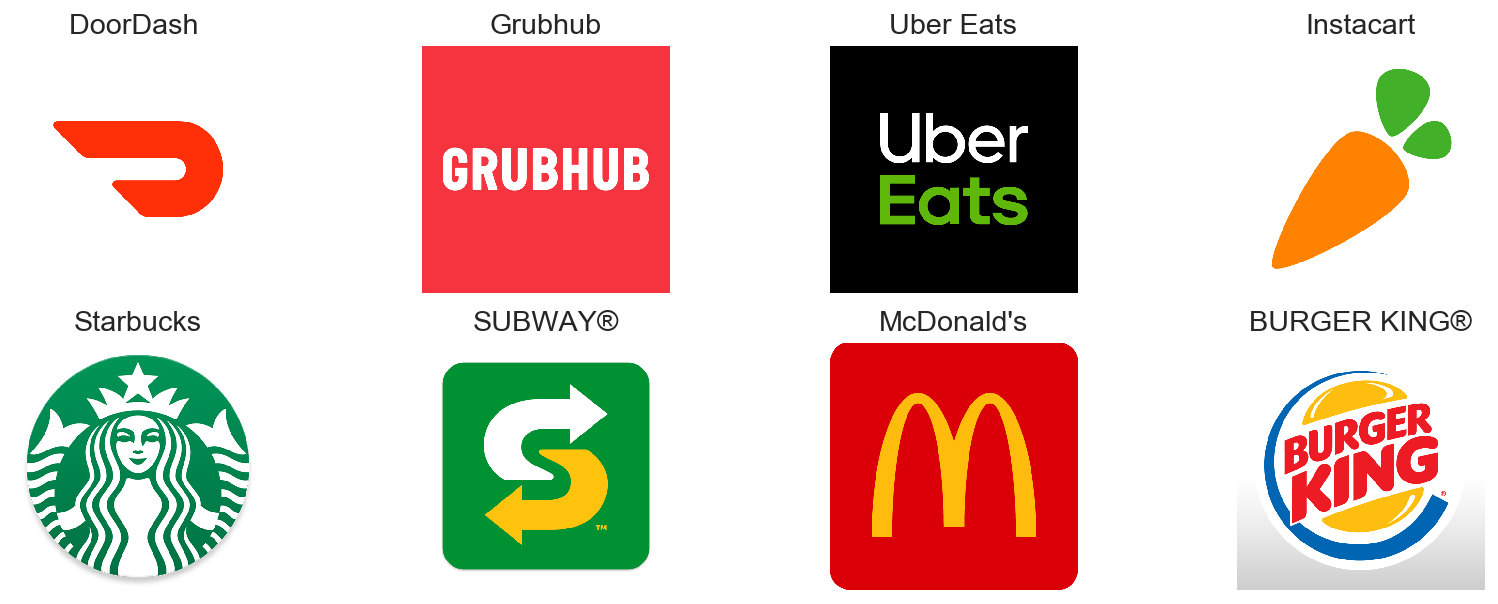

In [7]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:12]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [8]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [9]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 9/9 [01:11<00:00,  7.98s/it]


In [10]:
print_json(app_reviews[0])

{
  "appId": "com.dd.doordash",
  "at": "2020-05-04 16:55:26",
  "content": "At first, this was a great app. Your food came in a timely manner and everything was correct on the orders. Now, the last 4 times Ive ordered, something has either been missing or the order is completely wrong. One of those times they delivered my order to the wrong address. They have been great about compensating me for mistakes until this morning. I had an entire combo missing from my order, and now I cant even get my money back for it or have someone come back with the rest of the order?",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "12.5.3",
  "reviewId": "gp:AOqpTOHRkC7z1DfVv1EDejp63hESEmryNeZaJE9MwyiaYDkbinrqNRRGZEraViWWWSo6quWA-C3iPX_csIel0w",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 324,
  "userImage": "https://lh3.googleusercontent.com/-fisSzZs5lFo/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucly2RYnbR7SvZBgP-A2l40TgsbaAw/photo.jpg",
  "userName": "XMs_ MorgueX"
}



In [11]:
len(app_reviews)

10800

In [12]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [13]:
df = pd.read_csv('reviews.csv', lineterminator='\n')
df.shape
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId\r
10795,gp:AOqpTOEnKFPsuHL2fcbwExcjVrHZsjPm6d4nxyaODlB...,Micki Postlewait,https://lh3.googleusercontent.com/a-/AOh14Gjx_...,Very easy to use,5,0,7.4.0,2020-05-17 02:41:52,NaN,NaN,newest,com.dominospizza\r
10796,gp:AOqpTOHgDgYf2jJ3XaqnfQq9V_n4krXk7MF8309ZgRT...,Marlene Williams,https://lh3.googleusercontent.com/-OUqiCmJfbPQ...,Super! Super! Exellent!!!!,5,0,7.4.0,2020-05-17 02:35:03,NaN,NaN,newest,com.dominospizza\r
10797,gp:AOqpTOHMXzGrnI9serbDs2jQebl4O-WF6D3VvxRKE9_...,Christy Green,https://lh3.googleusercontent.com/-NzQZA1mkxoo...,Quick and easy,5,0,7.4.0,2020-05-17 02:34:55,NaN,NaN,newest,com.dominospizza\r
10798,gp:AOqpTOH3PY37FDdTkXskPzfjELIeillGk8Zj5bzmwtU...,Summer Dawn,https://lh3.googleusercontent.com/-kJ1dA6V9i1o...,Great,5,0,7.4.0,2020-05-17 02:34:14,NaN,NaN,newest,com.dominospizza\r
10799,gp:AOqpTOEqzn5Oq2WPhC3SBcNKjIMhHEzWTuq3T4ohL6x...,Chad Dulac,https://lh3.googleusercontent.com/a-/AOh14GivH...,"Versatile, accurate and easy to use",5,0,7.4.0,2020-05-17 02:33:56,NaN,NaN,newest,com.dominospizza\r
